# **Importing the Datasets**

In [1]:
import kagglehub

# Download latest version
new_plant_diseases_dataset_path = kagglehub.dataset_download('vipoooool/new-plant-diseases-dataset')
print('path-',new_plant_diseases_dataset_path)

path- /kaggle/input/new-plant-diseases-dataset


# **Importing the libraries**

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# **Loading the image dataset**

In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [4]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

# **Building the model** 

In [7]:
from tensorflow.keras.layers import (
    Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
)
from tensorflow.keras.models import Sequential

# Initialize the Sequential model
cnn = Sequential()

# Define the CNN architecture
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

# Add Dropout and Fully Connected Layers
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=1500, activation='relu'))
cnn.add(Dropout(0.4))
cnn.add(Dense(units=38, activation='softmax'))

# Display the model summary
cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

# **Training our model**

In [11]:
history=cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 164s 69ms/step - accuracy: 0.3772 - loss: 2.1916 - val_accuracy: 0.8075 - val_loss: 0.6114
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.8307 - loss: 0.5376 - val_accuracy: 0.9105 - val_loss: 0.2690
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 128s 58ms/step - accuracy: 0.9056 - loss: 0.2911 - val_accuracy: 0.9347 - val_loss: 0.2125
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 130s 59ms/step - accuracy: 0.9337 - loss: 0.2020 - val_accuracy: 0.9479 - val_loss: 0.1614
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.9525 - loss: 0.1445 - val_accuracy: 0.9556 - val_loss: 0.1415
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.9642 - loss: 0.1081 - val_accuracy: 0.9565 - val_loss: 0.1395
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.9689 - loss: 0.0927 - val_accuracy: 0.9663 - val_loss: 0.1138
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 

# **Evaluating our model**

In [12]:
train_loss,train_acc=cnn.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.9893 - loss: 0.0338


In [14]:
validation_loss,validation_acc=cnn.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9628 - loss: 0.1242


In [15]:
print('Train_Loss',train_loss)
print('Train_Accuracy',train_acc*100)
print('Validation_loss',validation_loss)
print('Validation_Accuracy',validation_acc*100)

Train_Loss 0.030992161482572556
Train_Accuracy 99.00846481323242
Validation_loss 0.12350088357925415
Validation_Accuracy 96.35215401649475


# **Saving our model**

In [17]:
cnn.save('model.h5')

In [19]:
cnn.save('model.keras')

In [20]:
historic=history
historic.history

{'accuracy': [0.5805249214172363,
  0.8559072613716125,
  0.9149868488311768,
  0.9391990900039673,
  0.9550750255584717,
  0.9655451774597168,
  0.9715058207511902,
  0.9762145280838013,
  0.981022834777832,
  0.9823031425476074],
 'loss': [1.411787986755371,
  0.4544091522693634,
  0.2624674439430237,
  0.18481382727622986,
  0.1358068436384201,
  0.10415830463171005,
  0.08621681481599808,
  0.07386405020952225,
  0.059802792966365814,
  0.0537848025560379],
 'val_accuracy': [0.8075346946716309,
  0.9105395078659058,
  0.9347257018089294,
  0.9478716254234314,
  0.9555543065071106,
  0.95652174949646,
  0.9663100242614746,
  0.9698953032493591,
  0.9664238691329956,
  0.9635215401649475],
 'val_loss': [0.6114173531532288,
  0.268995076417923,
  0.21253317594528198,
  0.16141019761562347,
  0.14152219891548157,
  0.13945850729942322,
  0.11381540447473526,
  0.09622780978679657,
  0.1054479330778122,
  0.12350090593099594]}

In [21]:
import json
with open('training_hist.json','w') as f:
    json.dump(historic.history,f)

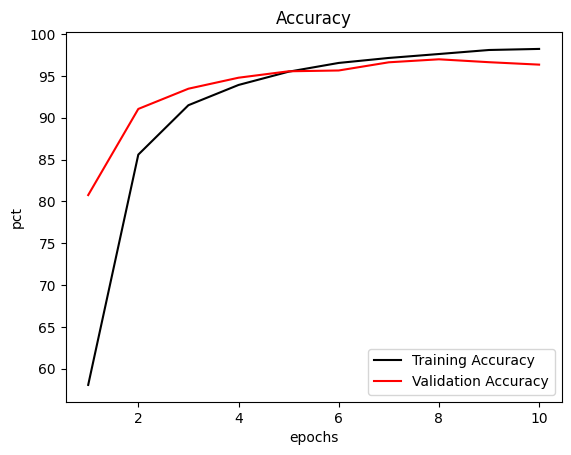

In [31]:
epochs=[i for i in range(1,11)]
historic.history['accuracy'] = [acc / 100 for acc in historic.history['accuracy']]
historic.history['val_accuracy'] = [val_acc / 100 for val_acc in historic.history['val_accuracy']]
plt.plot(epochs,historic.history['accuracy'],color='black',label='Training Accuracy')
plt.plot(epochs,historic.history['val_accuracy'],color='red',label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('pct')
plt.title('Accuracy')
plt.legend()
plt.show()

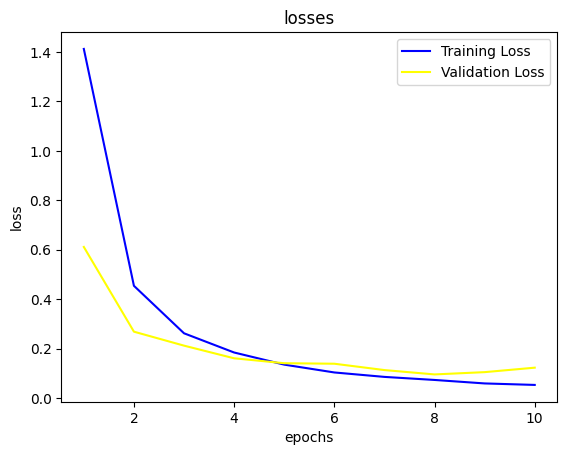

In [29]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,historic.history['loss'],color='blue',label='Training Loss')
plt.plot(epochs,historic.history['val_loss'],color='yellow',label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('losses')
plt.legend()
plt.show()

# **Precision recall scores and confusion matrix**

In [32]:
v_test=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [37]:
v_test

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [38]:
pred=cnn.predict(v_test)
pred,pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step


(array([[3.1321898e-01, 6.8677998e-01, 3.5995568e-10, ..., 2.3847846e-15,
         3.4620573e-13, 1.1033245e-12],
        [9.9998903e-01, 1.0972904e-05, 7.5602007e-12, ..., 3.8871378e-17,
         1.8676981e-15, 6.4827693e-17],
        [9.9970007e-01, 2.9974713e-04, 1.3492980e-12, ..., 7.6539345e-20,
         6.7598682e-17, 1.5177062e-14],
        ...,
        [1.5186782e-09, 4.4449264e-13, 3.6423482e-09, ..., 4.1747638e-12,
         2.5298533e-12, 9.9996769e-01],
        [1.5991871e-11, 1.5944912e-14, 6.1768132e-11, ..., 4.0851979e-13,
         9.3987643e-13, 9.9999952e-01],
        [7.7670166e-20, 3.3061058e-21, 4.4282675e-19, ..., 2.3540227e-21,
         3.9544651e-19, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [39]:
cat_predicted=tf.argmax(pred,axis=1)
cat_predicted

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 1,  0,  0, ..., 37, 37, 37])>

In [41]:
true_cat=tf.concat([x for y,x in v_test],axis=0)
true_cat

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [42]:
true_cat_col=tf.argmax(true_cat,axis=1)
true_cat_col

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [45]:
act_name = v_test.class_names

In [47]:
from sklearn.metrics import classification_report
print(classification_report(true_cat_col,cat_predicted,target_names=act_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.87      0.91       504
                                 Apple___Black_rot       0.78      1.00      0.87       497
                          Apple___Cedar_apple_rust       0.98      0.96      0.97       440
                                   Apple___healthy       0.98      0.92      0.95       502
                               Blueberry___healthy       0.99      0.91      0.94       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.93      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.97      0.

In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_cat_col,cat_predicted)
print(cm)

[[440  47   3 ...   0   0   0]
 [  0 497   0 ...   0   0   0]
 [  0   1 422 ...   0   1   1]
 ...
 [  0   0   0 ... 481   0   0]
 [  0   0   0 ...   0 447   0]
 [  1   0   0 ...   0   0 476]]


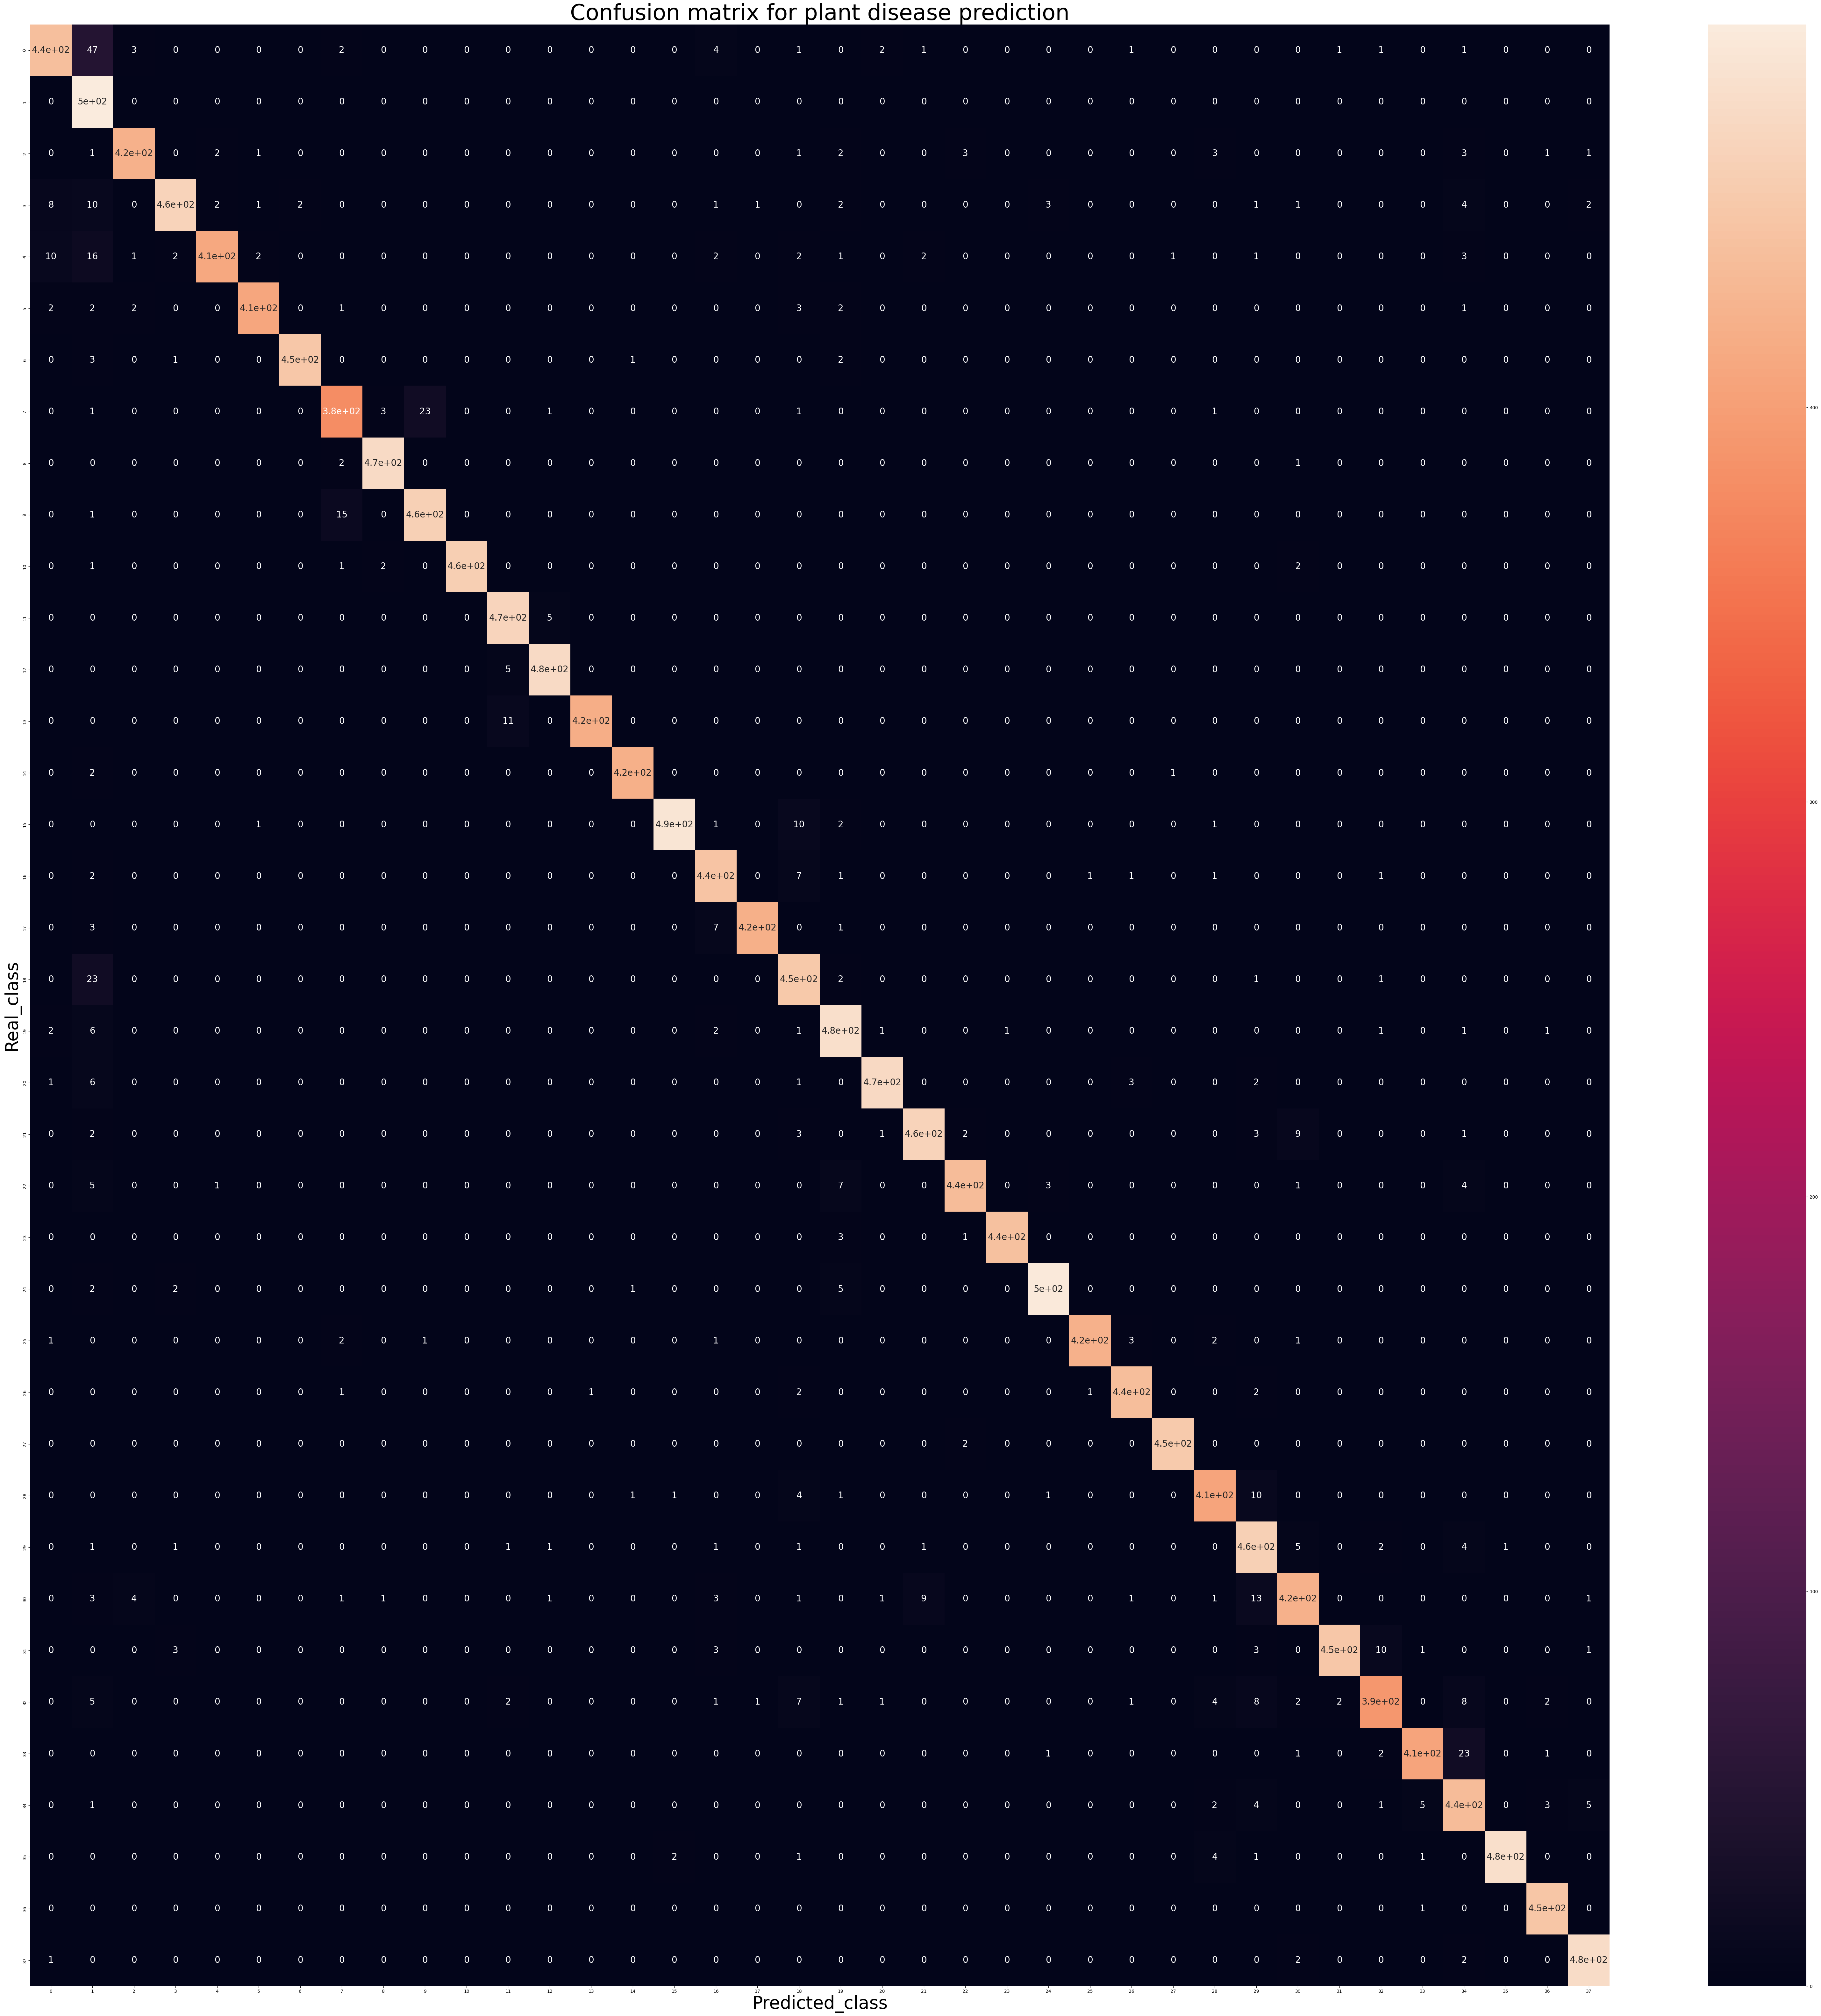

In [63]:
plt.figure(figsize=(80,80))
sns.heatmap(cm,annot=True,annot_kws={"size": 20})
plt.xlabel('Predicted_class',fontsize=40)
plt.ylabel('Real_class',fontsize=40)
plt.title('Confusion matrix for plant disease prediction',fontsize=50)
plt.savefig('sns4.png', dpi=300)
plt.show()

In [64]:
import cv2

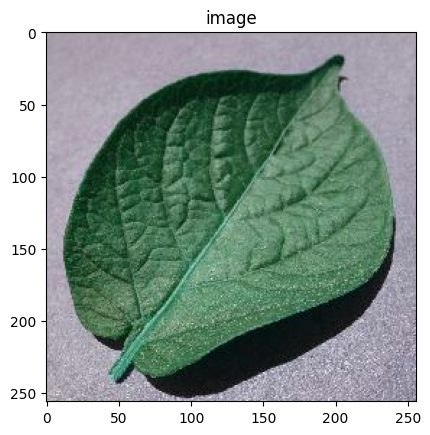

In [74]:
# importing healthy potato image
path_im='/kaggle/input/new-plant-diseases-dataset/test/test/PotatoHealthy2.JPG'
img=cv2.imread(path_im)
plt.imshow(img)
plt.title('image')
plt.show()

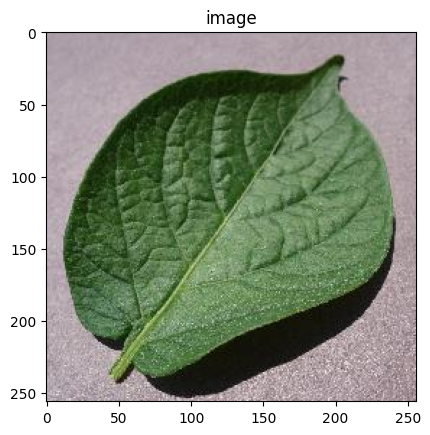

In [75]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# converting bgr image to rgb
plt.imshow(img)
plt.title('image')
plt.show()

# **Testing our model**

In [76]:
image=tf.keras.preprocessing.image.load_img(path_im,target_size=(128,128))
input_array=tf.keras.preprocessing.image.img_to_array(image)
input_array=np.array([input_array])
input_array.shape

(1, 128, 128, 3)

In [77]:
prediction=cnn.predict(input_array)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


(array([[4.6008250e-10, 1.1857110e-08, 8.1859812e-13, 2.8117498e-08,
         2.8223529e-10, 2.9144141e-08, 3.1002705e-09, 6.6801423e-14,
         2.0534542e-12, 2.9363949e-14, 5.0374567e-14, 1.4704712e-12,
         1.3721149e-13, 3.8930231e-14, 4.8654167e-12, 4.8745216e-11,
         1.9162189e-11, 1.9377864e-11, 6.6632477e-09, 7.7784825e-06,
         1.4641379e-08, 1.6599950e-07, 9.9999177e-01, 6.6282091e-10,
         2.0412136e-07, 4.7918172e-14, 4.0340812e-15, 2.2703370e-08,
         1.6701631e-12, 1.9298044e-11, 8.8228487e-11, 1.0341612e-13,
         4.3021770e-11, 5.2308207e-13, 1.4014211e-09, 1.4160728e-13,
         1.4580925e-13, 1.3638808e-12]], dtype=float32),
 (1, 38))

In [78]:
result_idx=np.argmax(prediction)
print(act_name[result_idx])
# And we got it right

Potato___healthy


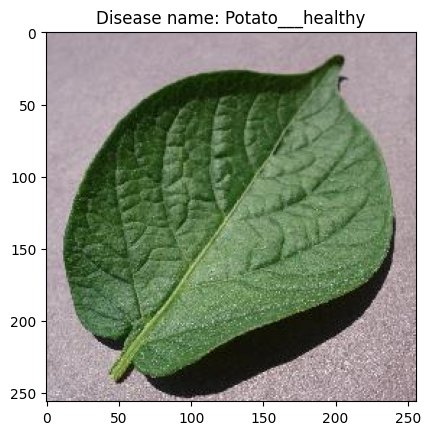

In [79]:
plt.imshow(img)
plt.title(f'Disease name: {act_name[result_idx]}')
plt.show()